In [40]:
#Importing the ImageDataGenerator Library

In [41]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [42]:
#Define the parameters/arguments for ImageDataGenerator class

In [43]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
#Applying ImageDataGenerator functionality to trainset

In [45]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/train_set',
target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


In [46]:
#Applying ImageDataGenerator functionality to testset

In [47]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/test_set',
target_size=(128,128),batch_size=32,class_mode='binary')

Found 118 images belonging to 2 classes.


In [48]:
#importing the model building libraries 

In [49]:
#To define linear intialisation import Sequential 
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To creat Convolution kernal import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [50]:
#initializing the model
model=Sequential()

In [51]:
#Adding CNN layers

In [52]:
#add convolutional layer 
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())

In [53]:
#Adding Dense Layers

In [54]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output Layer
model.add(Dense(1,activation='sigmoid'))

In [55]:
#configuring the learning process
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [56]:
#Training the model
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 32s 2s/step - loss: 4.2524 - accuracy: 0.6239 - val_loss: 1.0090 - val_accuracy: 0.8559
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 0.9303 - accuracy: 0.8142 - val_loss: 0.0538 - val_accuracy: 0.9831
Epoch 3/10
14/14 [==============================] - 27s 2s/step - loss: 0.3455 - accuracy: 0.8739 - val_loss: 0.0729 - val_accuracy: 0.9746
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.2186 - accuracy: 0.9014 - val_loss: 0.0713 - val_accuracy: 0.9746
Epoch 5/10
14/14 [==============================] - 26s 2s/step - loss: 0.1805 - accuracy: 0.9243 - val_loss: 0.0582 - val_accuracy: 0.9746
Epoch 6/10
14/14 [==============================] - 27s 2s/step - loss: 0.1658 - accuracy: 0.9358 - val_loss: 0.0745 - val_accuracy: 0.9746
Epoch 7/10
14/14 [==============================] - 25s 2s/step - loss: 0.1911 - accuracy: 0.9220 - val_loss: 0.0672 - val_accuracy: 0.9746
Epoch 8/10
14/14 [==

In [57]:
#save the model
model.save("forest1.h5")

In [58]:
#predictions

In [98]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [99]:
#load the saved model
model = load_model("forest1.h5")

In [100]:
img=image.load_img('/content/drive/MyDrive/Dataset/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128,128 ), interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [101]:
pred=model.predict(x)

1/1 [==============================] - 0s 80ms/step


In [102]:
pred

array([[1.]], dtype=float32)

In [103]:
#Opencv for video processing

In [104]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model

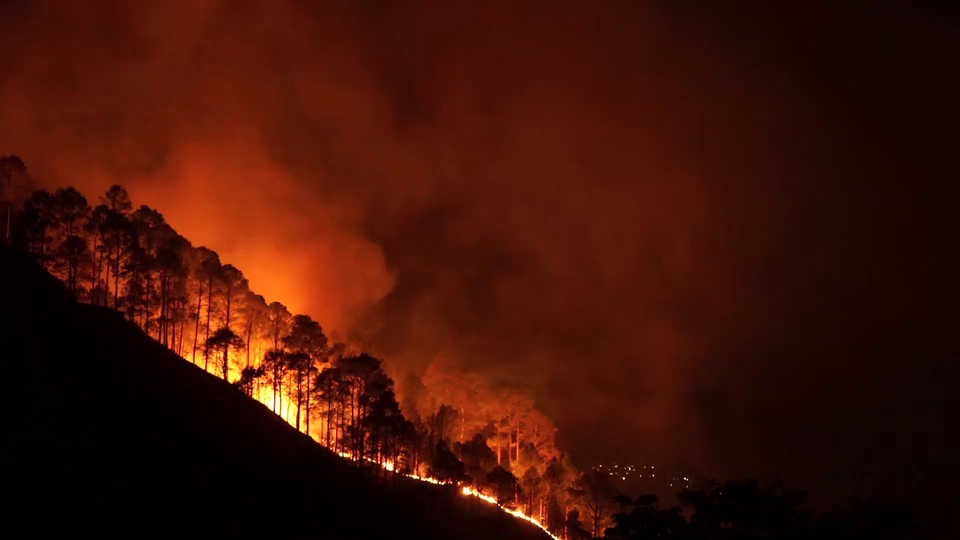

1/1 [==============================] - 0s 110ms/step
Forest fire
SMba5a5d46b9300284120e309cbbe86f84
Fire detected
SMS Sent!


In [114]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/Forest with fire.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()
from twilio.rest import Client
from playsound import playsound
if pred==0:
  account_sid='ACff2114503c83032fe8cb614ba790fa6f'
  auth_token='ae033e259f08d7b1f5b64d38f3e4def7'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+17088347091',
      #to number
      to='+917094693674')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
